#London
#Heron
#BushyPark
#london
#TwitterNatureCommunity
#photography
#birdphotography
#NaturePhotography
#nikonphotography
#Artwork
#Artist
#Queen
#queenelizabethii
#Unitedkingdom
#Beautiful
#Royal
#London
#queenelizabeth2
#royals
#britishroyalfamily
#royalfamily
#sale
#Artistontwitter
#museumofart
#exhibition
#OsimeBrown
#autistic
#London
#BlackAutisticLivesMatter
#BlackLivesMatter
#covidqueue
#thefullmonty
#hairdressers
#london
#London
#Unitedkingdom
Latest
Photos
View all
#UnitedKingdom
#UnitedKingdom
#smallscaledab
#UnitedKingdom
#Covid
#coronavirus
#UnitedKingdom
View all
Latest
Photos
#SaveBritain
#digitaldiplomacy
Latest
Latest
Photos
#SearchNCollect
#eBay
#Auction
#GB
#UnitedKingdom
#FunkoPop
#Avengers
#PopFigures
#UnitedKingdom
#Architects
#Artists
#MedicalPractitioners
#Nurses
#Programmers
#Surveyors
#Veterinarians
#GoinGlobal
#Blog
#ReTweet
#StudioVibesTurnedUpOnline
#UnitedKingdom
#Musiceternal
#GaryNuman
#SaintsAndLiars
#Intruder
#Music
#MusicVideo
#Electronic
#Synthpop


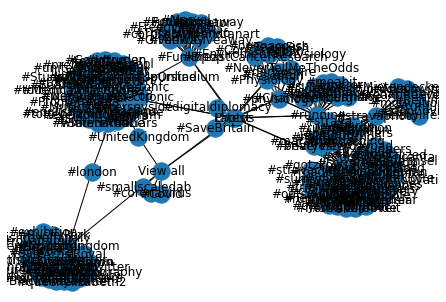

In [21]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import networkx as nx
import random


def init():
    chrome_options = Options()
    driver = webdriver.Chrome(executable_path="drivers/chromedriver", options=chrome_options)

    G = nx.Graph()

    used_tags = []
    target_tags = ['London', 'Berlin']

    for target in target_tags:
        crawl(G, target, driver)

    driver.close()
    nx.draw(G, with_labels=True)
    nx.write_gexf(G, "models/test.gexf")

def crawl(graph, tag, driver):

    page_number = 0

    current_hashtag = '#' + tag
    current_url = 'https://twitter.com/search?q=%23' + tag
    last_tag = current_hashtag
    nav_tags = ['Top', 'Latest', 'People', 'Photos', 'Videos', 'View all']


    while page_number < 5:
        print(current_hashtag)
        driver.get(current_url)

        time.sleep(5)

        hashtags = driver.find_elements_by_xpath('//a[contains(@href,"hashtag")]')

        for htag in hashtags:
            if nav_tags.__contains__(htag.text):
                hashtags.remove(htag)

        for t in hashtags:
            print(t.text)

        random_hashtag = random.choice(hashtags)

        graph.add_node(random_hashtag.text)
        graph.add_edge(last_tag, random_hashtag.text)

        last_tag = random_hashtag.text

        for tag in hashtags:
            graph.add_node(tag.text)
            graph.add_edge(random_hashtag.text, tag.text)

        current_url = random_hashtag.get_attribute('href')
        current_hashtag = random_hashtag.text

        page_number += 1


if __name__ == '__main__':
    init()